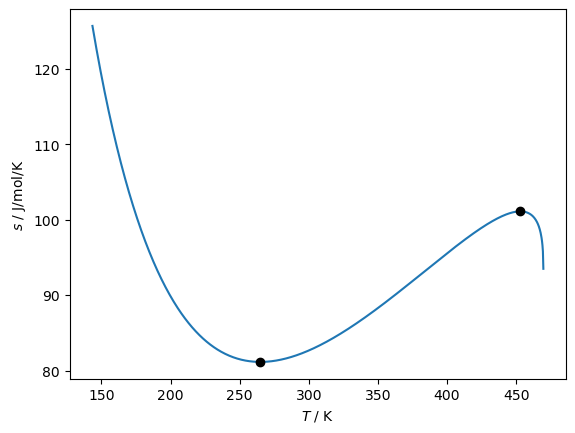

In [22]:
import json 
import functools

import numpy as np
import matplotlib.pyplot as plt

import teqpflsh 
import CoolProp.CoolProp as CP

FLD = 'PENTANE'
j = json.load(open(f'superancillaryJSON/{FLD}_exps.json'))
sa = teqpflsh.SuperAncillary(json.dumps(j))

AS = CP.AbstractState('HEOS',FLD)
def calc(T, rho, AS, key):
    AS.specify_phase(CP.iphase_gas)
    AS.update(CP.DmolarT_INPUTS, rho, T)
    val = AS.keyed_output(key)
    AS.unspecify_phase()
    return val

# Order of ms per variable, likely MUCH faster in C++
sa.add_variable(k='S', caller=functools.partial(calc, AS=AS, key=CP.iSmolar))

approx1d = sa.get_approx1d(k='S', q=1)
Ts = np.linspace(approx1d.xmin, approx1d.xmax, 1000)
y = np.zeros_like(Ts)
sa.eval_sat_many(k='S', T=Ts, q=1, y=y)
plt.plot(Ts, y)

for x in approx1d.x_at_extrema:
    plt.plot(x, approx1d.eval(x), 'ko')
    
plt.gca().set(xlabel='$T$ / K', ylabel='$s$ / J/mol/K')
plt.savefig(f'{FLD}_multiple_ssatV.pdf')
plt.show()